In [15]:
#Importing dataset from sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [3]:
#Importing Libraries for required procedures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = fetch_california_housing()

In [5]:
#Converting the dataset into pandas dataframe and assigning it field names
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names

target = pd.DataFrame(df.target)
target.rename(columns={0: 'Target'}, inplace=True)

#Adding the labels to the dataset for training purpose
housing = pd.concat([dataset,target],axis=1)
print(housing.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')


In [6]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
#Getting variable types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
#Getting # rows and # columns
print("dimension of housing data: {}".format(dataset.shape))

dimension of housing data: (20640, 8)


In [12]:
age = housing['HouseAge']
price = housing['Target']

x=np.array(age).reshape(-1,1)
y=np.array(price).reshape(-1,1)
print(x)
print(y)

[[41.]
 [21.]
 [52.]
 ...
 [17.]
 [18.]
 [16.]]
[[4.526]
 [3.585]
 [3.521]
 ...
 [0.923]
 [0.847]
 [0.894]]


In [17]:
#Trainig the model with the help of Gradient Descent
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [18]:
model_mse = mean_squared_error(x,y)
print('MSE: ', math.sqrt(model_mse))
print('R Squared Value: ', model.score(x,y))

MSE:  29.371185504690224
R Squared Value:  0.011156305266710742


We can see that the R squared value is ~0.01, that means there is no linear relationship between the two variables age ans price. Let's plot the prediction and correct values in a scatter plot for visual understanding.

In [20]:
#Getting the b0 and b1 parameters of the model
#b1 of our model
print(model.coef_[0])
#b0 of our model
print(model.intercept_[0])

[0.0096845]
1.7911991658938475


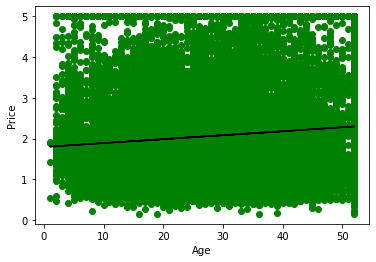

In [22]:
plt.scatter(x,y,color='green')
plt.plot(x,model.predict(x),color='black')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()